PSD is computed using both non-overlapping segments and Welch method. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import welch
import pandas as pd

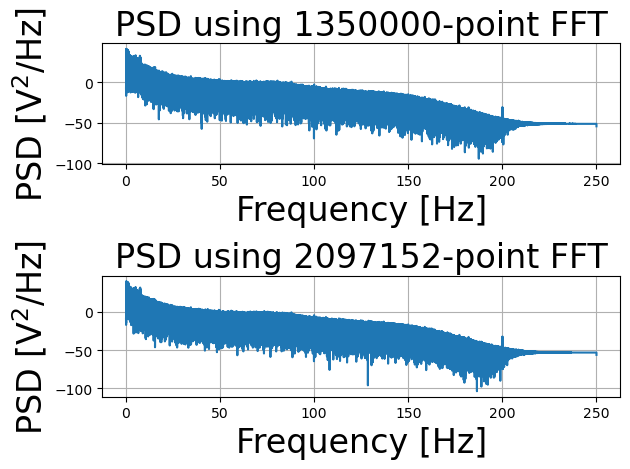

In [2]:
#Prendo un dato di esempio 
df = pd.read_csv('Y1.csv')

# Prendo i dati dalla seconda colonna
xout = df.iloc[:, 1].values


# fs - sampling frequency
fs = 500

m = [len(xout), 2**(np.ceil(np.log2(len(xout))))]

fig, axs = plt.subplots(2, 1)

for i in range(len(m)):
    N = int(m[i])
    xdft = fft(xout, N)
    xdft = xdft[0:N//2+1]
    psdx = (1/(fs*N)) * np.abs(xdft)**2
    psdx[1:-1] = 2*psdx[1:-1]
    freq = np.linspace(0, fs/2, N//2+1)

    axs[i].plot(freq, 10*np.log10(psdx))
    axs[i].set_title(f'PSD using {N}-point FFT', fontsize=24)
    axs[i].set_xlabel('Frequency [Hz]', fontsize=24)
    axs[i].set_ylabel('PSD [V$^2$/Hz]', fontsize=24)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

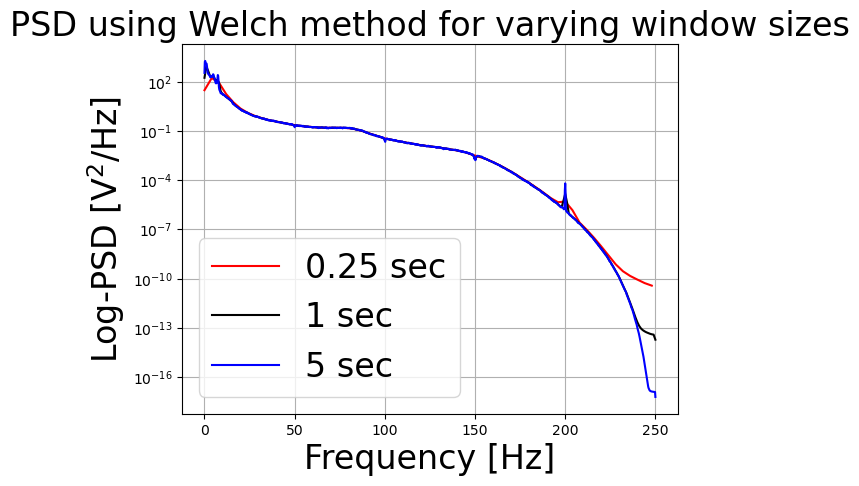

In [3]:
win = [int(np.ceil(0.25*fs)), int(np.ceil(fs)), int(np.ceil(5*fs))]
col = ['r', 'k', 'b']

plt.figure()

for i in range(len(win)):
    nfft = win[i]
    noverlap = int(0.5*win[i])
    f, pxx = welch(xout, fs, window='hann', nperseg=win[i], noverlap=noverlap, nfft=nfft)
    plt.semilogy(f, pxx, col[i])

plt.grid(True)
plt.legend(['0.25 sec', '1 sec', '5 sec'], fontsize=24)
plt.xlabel('Frequency [Hz]', fontsize=24)
plt.ylabel('Log-PSD [V$^2$/Hz]', fontsize=24)
plt.title('PSD using Welch method for varying window sizes', fontsize=24)
plt.show()


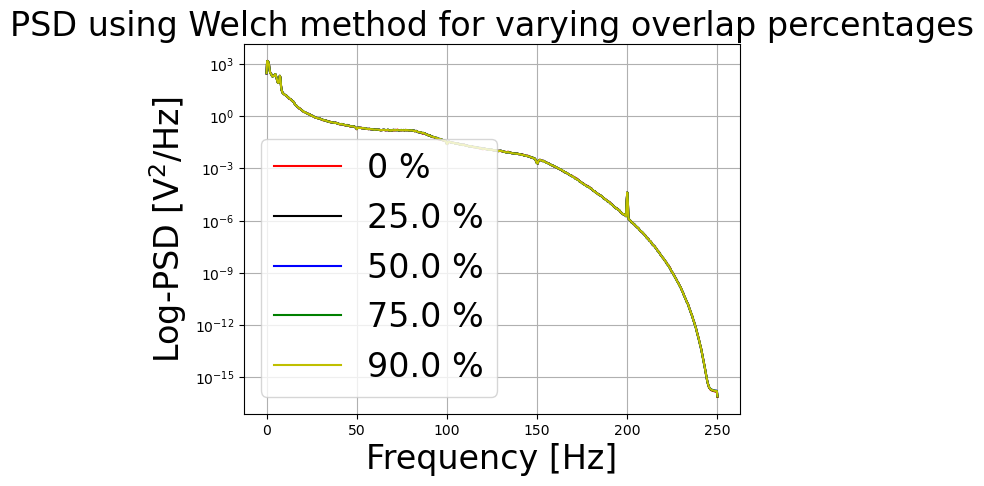

In [35]:
win = int(np.ceil(3 * fs))
nfft = win
noverlap_pc = [0, 0.25, 0.5, 0.75, 0.90]
noverlap = np.ceil(win * np.array(noverlap_pc)).astype(int)
col = ['r', 'k', 'b', 'g', 'y']

plt.figure()

for i in range(len(noverlap_pc)):
    f, pxx = welch(xout, fs, window='hann', nperseg=win, noverlap=noverlap[i], nfft=nfft)
    plt.semilogy(f, pxx, col[i])
plt.grid(True)
plt.legend([f'{pc * 100} %' for pc in noverlap_pc], fontsize=24)
plt.xlabel('Frequency [Hz]', fontsize=24)
plt.ylabel('Log-PSD [V$^2$/Hz]', fontsize=24)
#plt.xlim(0,20)
plt.title('PSD using Welch method for varying overlap percentages', fontsize=24)
plt.show()


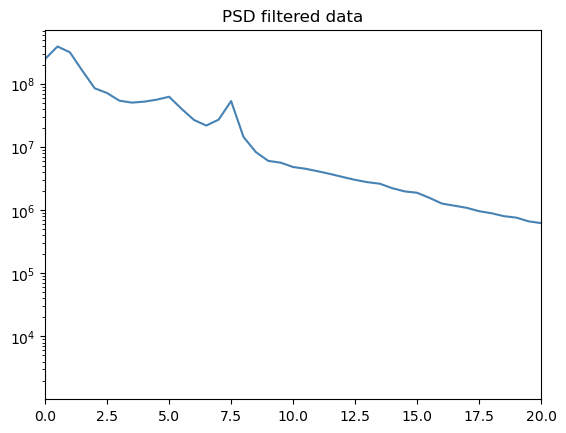

In [16]:
N = 2/ (1/fs)#al numeratore deve esserci la finestra temporale che si vuole considerare in secondi
divided_arrays = np.array_split(xout, len(xout) // N)
power_spectrum = np.zeros(int((len(divided_arrays[0]))/2)+1)
for i in range(len(divided_arrays)):
    power_spectrum = power_spectrum + (np.abs(np.fft.rfft(divided_arrays[i])))**2
    # Get the list of frequencies for the components in fft_vals
power_spectrum = power_spectrum/(len(divided_arrays))
fft_freq = np.fft.rfftfreq(len(divided_arrays[0]), 1.0/fs)
plt.plot(fft_freq,power_spectrum, color='steelblue')
plt.title('PSD filtered data')
plt.xlim(0,20)
plt.semilogy()
plt.show()

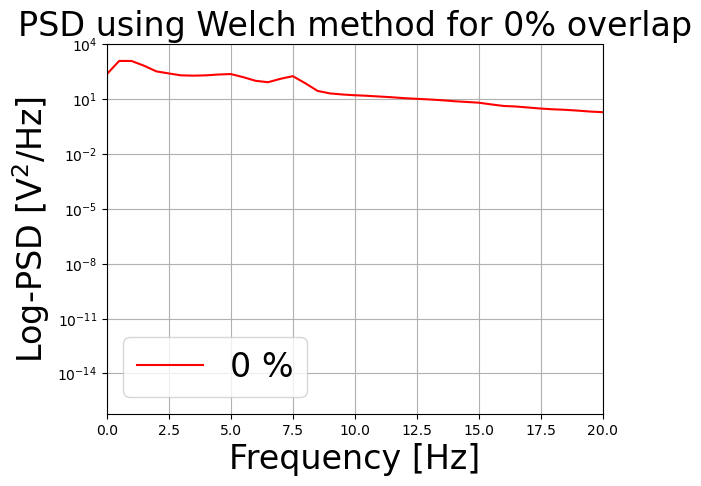

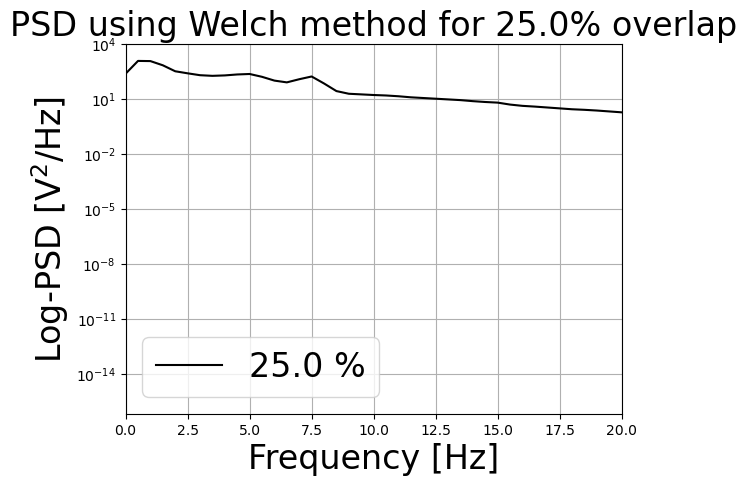

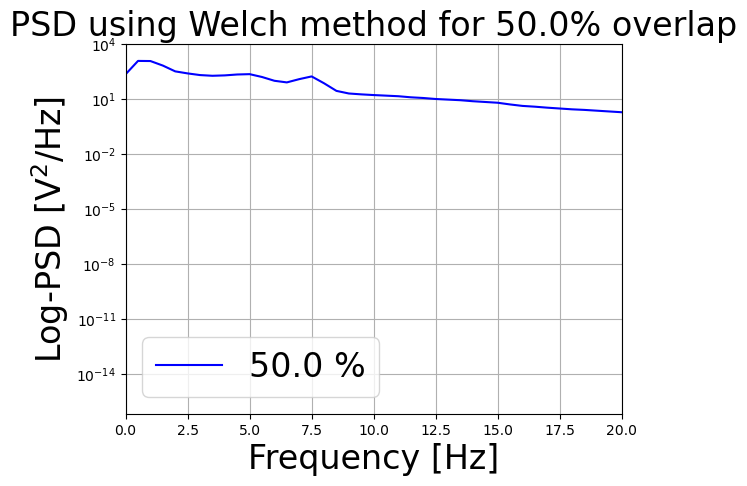

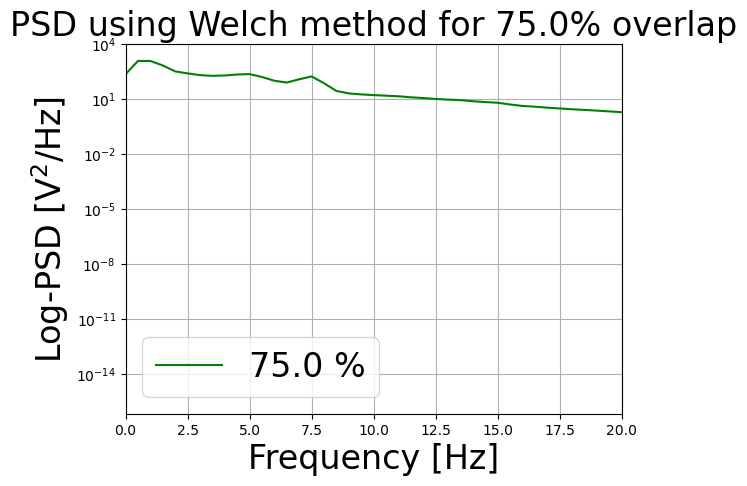

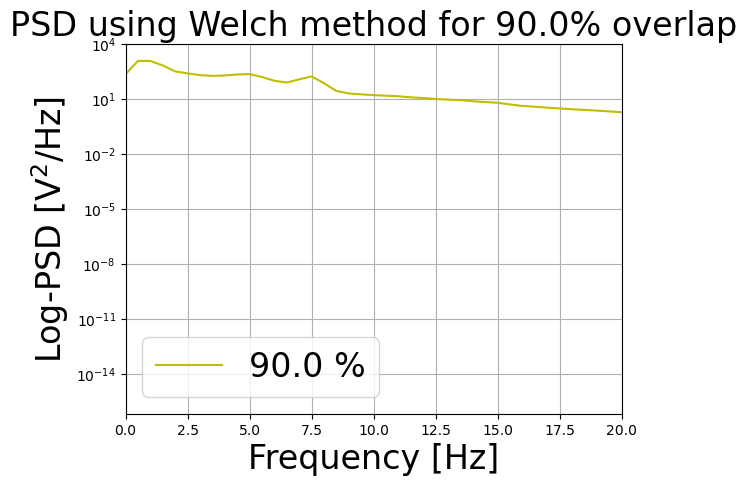

In [38]:
win = int(np.ceil(2 * fs))
nfft = win
noverlap_pc = [0, 0.25, 0.5, 0.75, 0.90]
noverlap = np.ceil(win * np.array(noverlap_pc)).astype(int)
col = ['r', 'k', 'b', 'g', 'y']

for i in range(len(noverlap_pc)):
    plt.figure()
    f, pxx = welch(xout, fs, window='hann', nperseg=win, noverlap=noverlap[i], nfft=nfft)
    plt.semilogy(f, pxx, col[i])
    plt.grid(True)
    plt.legend([f'{noverlap_pc[i] * 100} %'], fontsize=24)
    plt.xlabel('Frequency [Hz]', fontsize=24)
    plt.xlim(0,20)
    plt.ylabel('Log-PSD [µV$^2$/Hz]', fontsize=24)
    plt.title(f'PSD using Welch method for {noverlap_pc[i] * 100}% overlap', fontsize=24)
    plt.show()


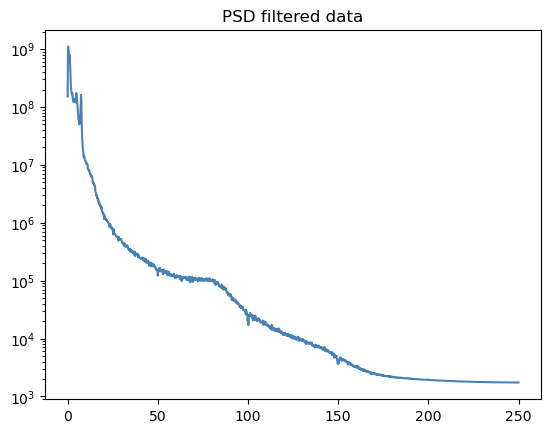

In [29]:
N = 5/ (1/fs)#al numeratore deve esserci la finestra temporale che si vuole considerare in secondi
divided_arrays = np.array_split(xout, len(xout) // N)
power_spectrum = np.zeros(int((len(divided_arrays[0]))/2)+1)
for i in range(len(divided_arrays)):
    power_spectrum = power_spectrum + (np.abs(np.fft.rfft(divided_arrays[i])))**2
    # Get the list of frequencies for the components in fft_vals
power_spectrum = power_spectrum/(len(divided_arrays))
fft_freq = np.fft.rfftfreq(len(divided_arrays[0]), 1.0/fs)
plt.plot(fft_freq,power_spectrum, color='steelblue')
plt.title('PSD filtered data')
#plt.xlim(0,20)
plt.semilogy()
plt.show()

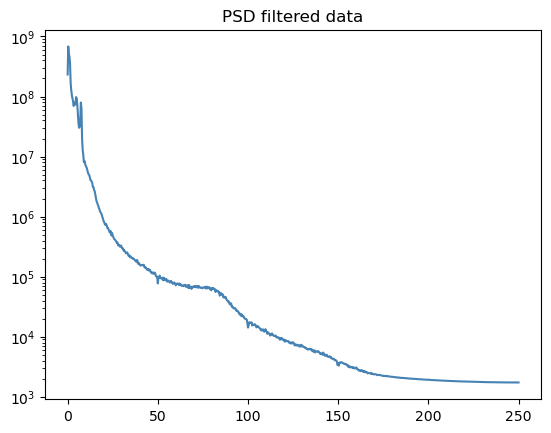

In [28]:
N = 3/ (1/fs)#al numeratore deve esserci la finestra temporale che si vuole considerare in secondi
divided_arrays = np.array_split(xout, len(xout) // N)
power_spectrum = np.zeros(int((len(divided_arrays[0]))/2)+1)
for i in range(len(divided_arrays)):
    power_spectrum = power_spectrum + (np.abs(np.fft.rfft(divided_arrays[i])))**2
    # Get the list of frequencies for the components in fft_vals
power_spectrum = power_spectrum/(len(divided_arrays))
fft_freq = np.fft.rfftfreq(len(divided_arrays[0]), 1.0/fs)
plt.plot(fft_freq,power_spectrum, color='steelblue')
plt.title('PSD filtered data')
#plt.xlim(0,20)
plt.semilogy()
plt.show()

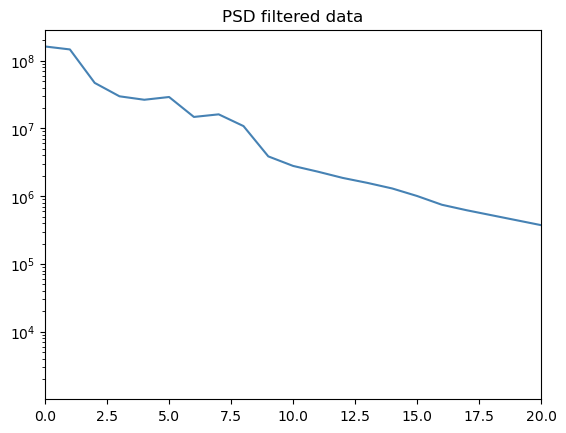

In [21]:
N = 1/ (1/fs)#al numeratore deve esserci la finestra temporale che si vuole considerare in secondi
divided_arrays = np.array_split(xout, len(xout) // N)
power_spectrum = np.zeros(int((len(divided_arrays[0]))/2)+1)
for i in range(len(divided_arrays)):
    power_spectrum = power_spectrum + (np.abs(np.fft.rfft(divided_arrays[i])))**2
    # Get the list of frequencies for the components in fft_vals
power_spectrum = power_spectrum/(len(divided_arrays))
fft_freq = np.fft.rfftfreq(len(divided_arrays[0]), 1.0/fs)
plt.plot(fft_freq,power_spectrum, color='steelblue')
plt.title('PSD filtered data')
plt.xlim(0,20)
plt.semilogy()
plt.show()

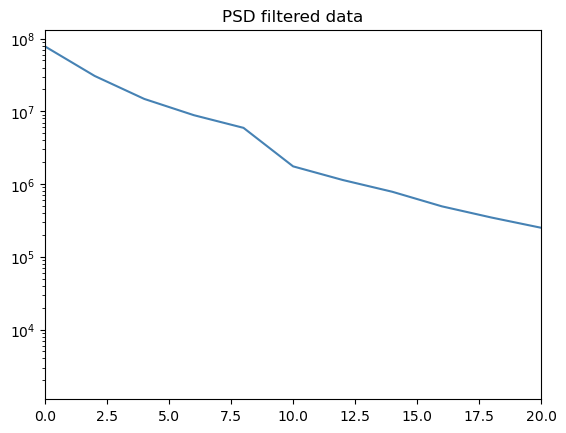

In [22]:
N = 0.5/ (1/fs)#al numeratore deve esserci la finestra temporale che si vuole considerare in secondi
divided_arrays = np.array_split(xout, len(xout) // N)
power_spectrum = np.zeros(int((len(divided_arrays[0]))/2)+1)
for i in range(len(divided_arrays)):
    power_spectrum = power_spectrum + (np.abs(np.fft.rfft(divided_arrays[i])))**2
    # Get the list of frequencies for the components in fft_vals
power_spectrum = power_spectrum/(len(divided_arrays))
fft_freq = np.fft.rfftfreq(len(divided_arrays[0]), 1.0/fs)
plt.plot(fft_freq,power_spectrum, color='steelblue')
plt.title('PSD filtered data')
plt.xlim(0,20)
plt.semilogy()
plt.show()

In [ ]:
def calculate_fft(data):
    fs=500
    # Calcola la trasformata di Fourier
    Y = np.fft.rfft(data)

    # Calcola le frequenze associate
    fft_freq = np.fft.rfftfreq(len(data), d=1/fs)

    # Calcola le ampiezze
    fft_amp = np.abs(Y) / len(data)

    # Calcola le fasi
    fft_phase = np.angle(Y)
    return fft_freq, fft_amp

def compute_power_spectrum(data):
    #2 sec
    Fs = 500
    N = 2/ (1/Fs)#al numeratore deve esserci la finestra temporale che si vuole considerare in secondi
    divided_arrays = np.array_split(data, len(data) // N)
    power_spectrum = np.zeros(int((len(divided_arrays[0]))/2)+1)
    for i in range(len(divided_arrays)):
        power_spectrum = power_spectrum + (np.abs(np.fft.rfft(divided_arrays[i])))**2
        # Get the list of frequencies for the components in fft_vals
    power_spectrum = power_spectrum/(len(divided_arrays))
    fft_freq = np.fft.rfftfreq(len(divided_arrays[0]), 1.0/Fs)
    return fft_freq,power_spectrum

def plot_psd(xout, fs):
    win = int(np.ceil(2 * fs))
    nfft = win
    noverlap_pc = [0.90]
    noverlap = np.ceil(win * np.array(noverlap_pc)).astype(int)
    col = ['r']

    plt.figure()

    
    f, pxx = welch(xout, fs, window='hann', nperseg=win, noverlap=noverlap, nfft=nfft)
    plt.semilogy(f, pxx, col)
    plt.grid(True)
    plt.legend([f'{pc * 100} %' for pc in noverlap_pc], fontsize=24)
    plt.xlabel('Frequency [Hz]', fontsize=24)
    plt.ylabel('Log-PSD [V$^2$/Hz]', fontsize=24)
    #plt.xlim(0,20)
    plt.title('PSD using Welch method for varying overlap percentages', fontsize=24)
    plt.show()
    return (f,pxx)

In [ ]:
Fs = 500.0
Ts = 1.0/Fs
t = np.arange(len(colonna[0])) / Fs
#itero su tutti i canali
psd= []
psd_welch=[]
# Create a new folder for modified CSV files
new_folder = 'psd_non_epi'
new_folder_1='psd_welch_non_epi'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)
if not os.path.exists(new_folder_1):
    os.makedirs(new_folder_1)
# Itera su ogni array all'interno di "colonna"

for data,label_array in zip(colonna,labels_array):
    print('CHANNEL',label_array)

#grafici DATI NON FILTRATI
    fft_freqs,fft_vals=calculate_fft(data)
    plt.plot(fft_freqs, fft_vals)
    plt.semilogy()
    plt.show()

#POWER SPECTRL DENSITY
    fft_freq,power_spectrum=compute_power_spectrum(data)
    psd.append(power_spectrum)

# Plot the spectrum
    plt.plot(fft_freq,power_spectrum)
    plt.title('PSD filtered data')
    plt.semilogy()
    plt.show()
    # Crea un nuovo DataFrame per la PSD
    psd_df = pd.DataFrame({
        'Frequenza': fft_freq,
        'PSD': power_spectrum
    })

    # Salva la PSD in un nuovo file CSV nella nuova cartella
    psd_df.to_csv(f'{new_folder}/{label_array}.csv', index=False)

    f,pxx=plot_psd(data,Fs)
    psd_welch.append(pxx)
    psd_welch_df = pd.DataFrame({
        'Frequenza': f,
        'PSD': pxx
    })

    # Salva la PSD in un nuovo file CSV nella nuova cartella
    psd_welch_df.to_csv(f'{new_folder_1}/{label_array}.csv', index=False)


